In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer,Binarizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('TitanicData.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.dropna(inplace=True)

In [4]:
df.shape

(714, 3)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

In [10]:
accuracy_score(Y_test,y_pred)

0.6363636363636364

In [11]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6344679186228481

In [12]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [13]:
trf = ColumnTransformer([('first',kbin_age,[0]),('second',kbin_fare,[1])])

In [14]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [15]:
trf.named_transformers_['first'].n_bins_

array([15])

In [16]:
trf.named_transformers_['second'].n_bins_

array([15])

In [17]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [18]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [19]:
output = pd.DataFrame({'age':X_train['Age'],'age_trf':X_train_trf[:,0],'fare':X_train['Fare'],'fare_trf':X_train_trf[:,1]})

In [20]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [21]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
678,43.0,12.0,46.9000,11.0,"(42.0, 47.0]","(31.275, 51.479]"
424,18.0,2.0,20.2125,8.0,"(16.0, 19.0]","(18.75, 26.0]"
841,16.0,2.0,10.5000,5.0,"(6.0, 16.0]","(8.158, 10.5]"
581,39.0,11.0,110.8833,14.0,"(38.0, 42.0]","(108.9, 512.329]"
23,28.0,7.0,35.5000,11.0,"(25.0, 28.0]","(31.275, 51.479]"


In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,Y_train)
y_pred2 = clf.predict(X_test_trf)

In [23]:
accuracy_score(Y_test,y_pred2)

0.6363636363636364

In [24]:
X_trf_transform = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6317097026604068

In [25]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([('first',kbin_age,[0]),('second',kbin_fare,[1])])
    
    X_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('After')
    
    plt.show()

0.6289319248826291


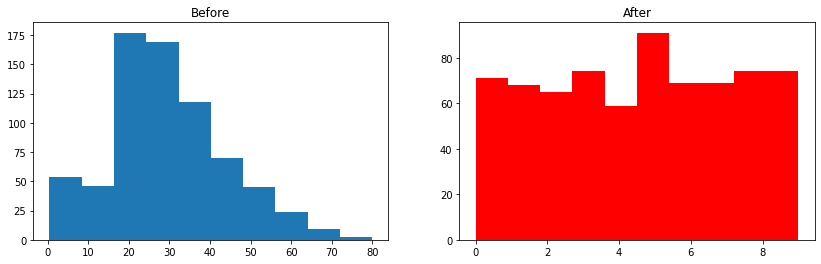

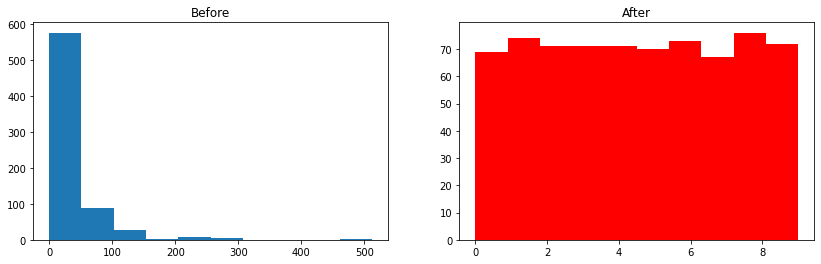

In [26]:
discretize(10,'quantile')

0.6330985915492957


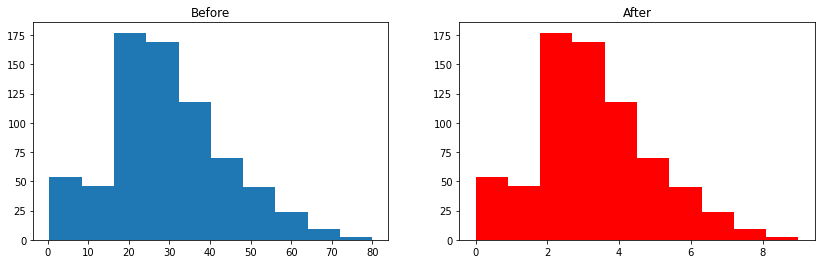

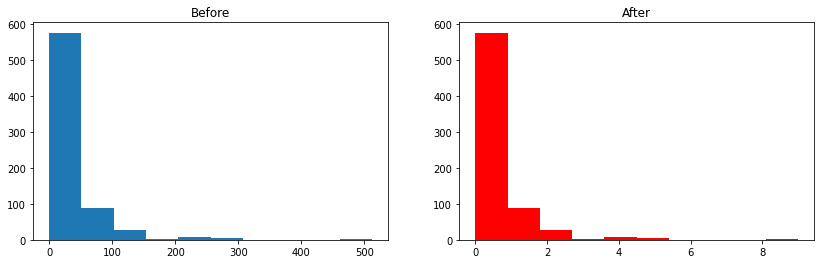

In [27]:
discretize(10,'uniform')

0.6317683881064162


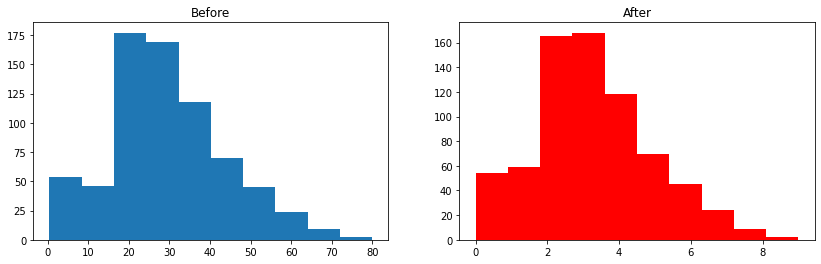

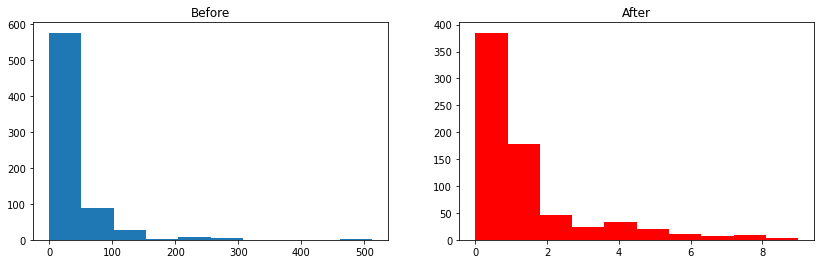

In [28]:
discretize(10,'kmeans')

## Binarizer

In [29]:
df = pd.read_csv('TitanicData.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])

In [30]:
df.dropna(inplace=True)

In [31]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [32]:
df['family'] = df['SibSp'] + df['Parch']

In [33]:
df.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [34]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [35]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [38]:
# Without Binarization
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,Y_test)

0.6433566433566433

In [39]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy'))

0.6400821596244131

In [40]:
# Applying Binarization
trf = ColumnTransformer([('bin',Binarizer(copy=False),['family'])],remainder='passthrough')

In [41]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [42]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [43]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,Y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_pred2,Y_test)

0.6013986013986014

In [44]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,Y,cv=10,scoring='accuracy'))

0.6275821596244131